In [1]:
import DecisionTreeC4
import DecisionTree
import treePlotter

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('zoo.csv')
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
myDat = data.iloc[:, 1:].values.tolist()
labels = data.iloc[:, 1:-1].columns.tolist()

In [4]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [5]:
DTtree = DecisionTree.tree(labels, myDat)
myTree = DTtree.fit(x_train, y_train)
# print("myTree:", myTree)
y_pre = DTtree.predict(x_test)
print(y_pre)
myTree

[1 1 2 5 4 1 1 1 2 2 1 7 4 1 1 1 6 1 2 4 1 1 1 1 4 7 4 2 2 1 7]


{'legs': {0: {'fins': {0: {'toothed': {0: 7, 1: 3}},
    1: {'eggs': {0: 1, 1: 4}}}},
  2: {'hair': {0: 2, 1: 1}},
  4: {'hair': {0: {'aquatic': {0: 3, 1: {'toothed': {0: 7, 1: 5}}}}, 1: 1}},
  5: 1,
  6: {'aquatic': {0: 6, 1: 7}},
  8: 1}}

In [6]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         6

    accuracy                           0.90        31
   macro avg       0.97      0.92      0.93        31
weighted avg       0.92      0.90      0.89        31



In [7]:
from sklearn import tree
import pydotplus
from IPython.display import Image 

In [8]:
cls = tree.DecisionTreeClassifier(criterion="entropy")
cls.fit(x_train, y_train)
y_pre = cls.predict(x_test)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       0.25      1.00      0.40         1
           7       1.00      0.50      0.67         6

    accuracy                           0.90        31
   macro avg       0.88      0.92      0.84        31
weighted avg       0.98      0.90      0.92        31



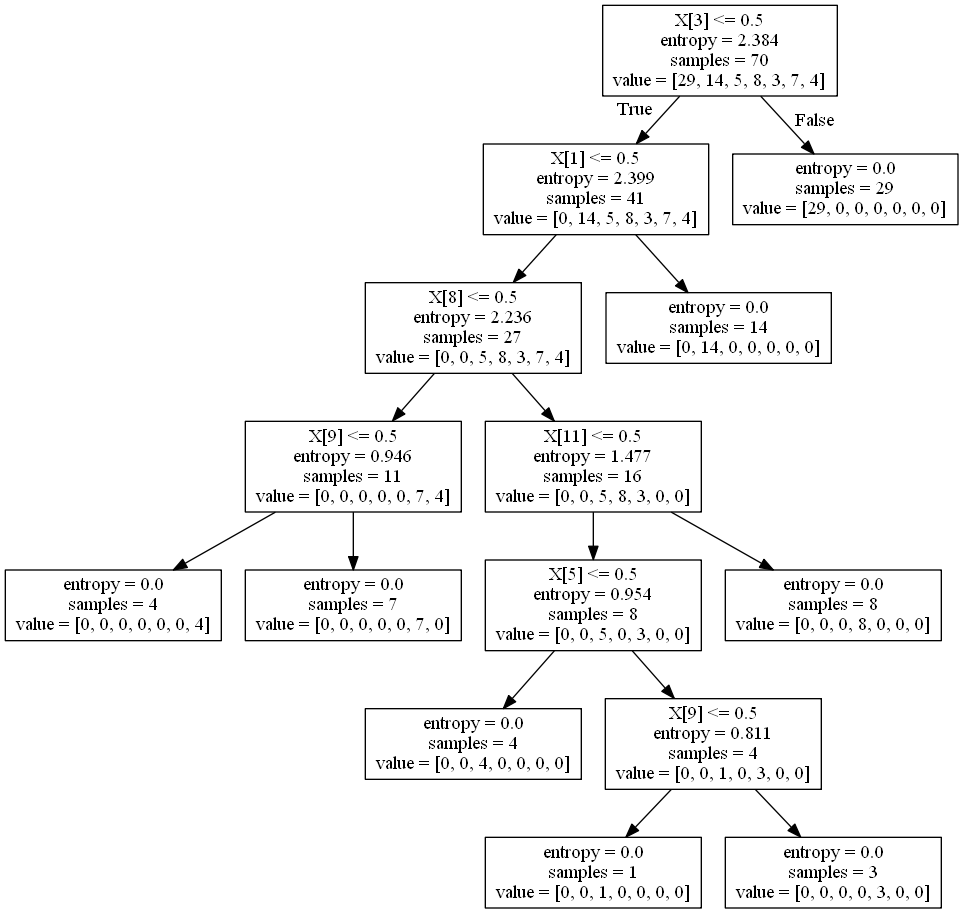

In [9]:
dot_data = tree.export_graphviz(cls, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

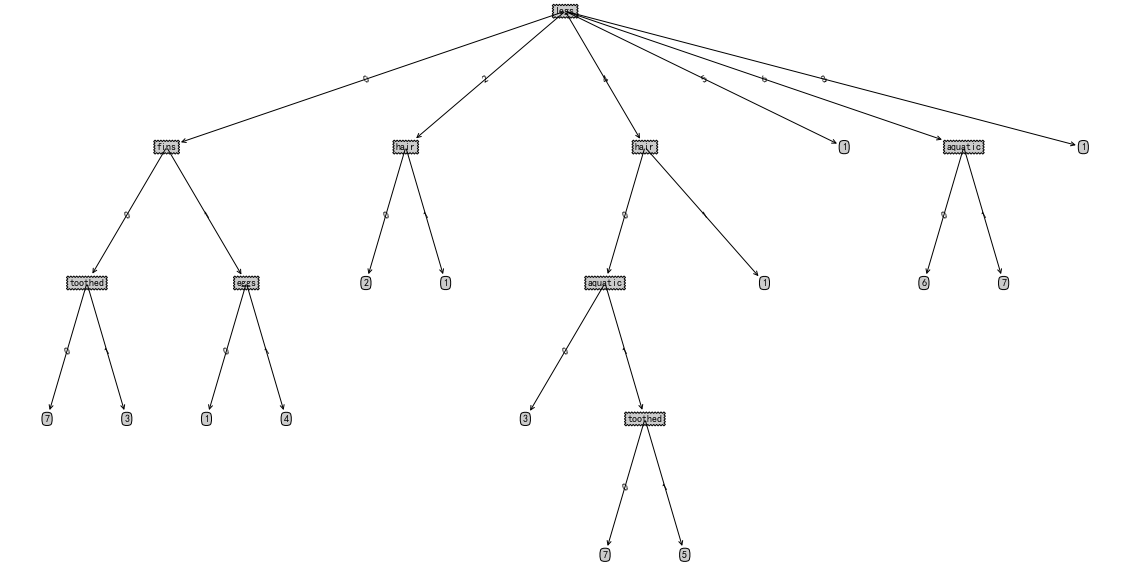

In [10]:
treePlotter.createPlot(myTree)

In [11]:
DTtree = DecisionTreeC4.tree(labels, myDat)
myTree = DTtree.fit(x_train, y_train)
# print("myTree:", myTree)
y_pre = DTtree.predict(x_test)
print(y_pre)
print(classification_report(y_test, y_pre))

[1 1 2 5 4 1 7 6 2 2 7 6 4 1 1 1 6 1 2 4 1 1 1 1 4 7 4 2 2 1 6]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       0.25      1.00      0.40         1
           7       1.00      0.50      0.67         6

    accuracy                           0.90        31
   macro avg       0.88      0.92      0.84        31
weighted avg       0.98      0.90      0.92        31



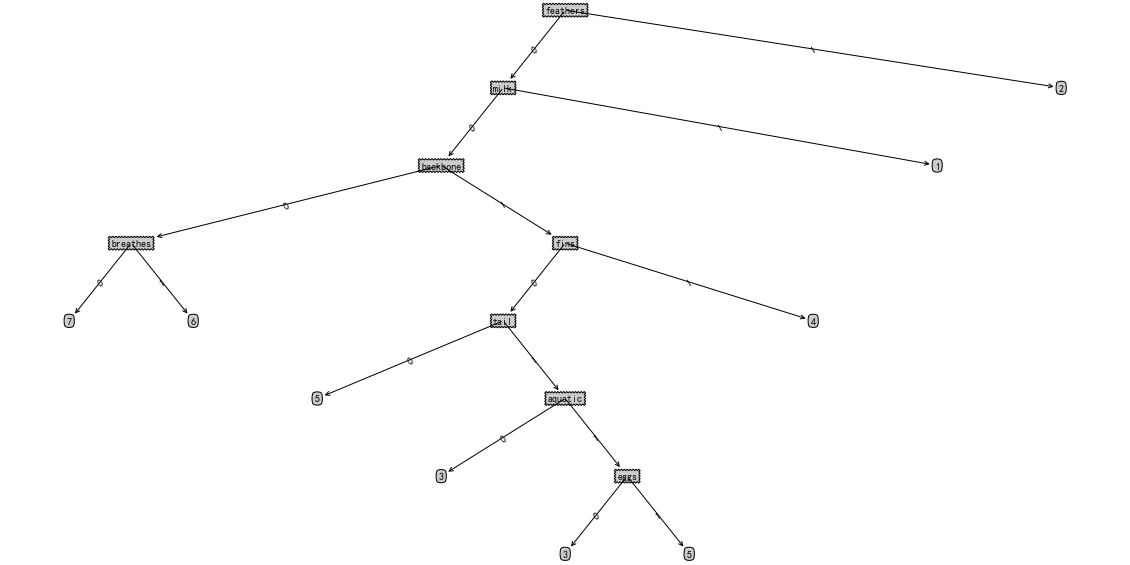

In [12]:
treePlotter.createPlot(myTree)

In [13]:
for i in range(2, 6):
    cls = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    cls.fit(x_train, y_train)
    y_pre = cls.predict(x_test)
    print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           4       0.38      1.00      0.56         5
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6

    accuracy                           0.74        31
   macro avg       0.40      0.50      0.43        31
weighted avg       0.64      0.74      0.67        31

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           4       0.83      1.00      0.91         5
           5       0.00      0.00      0.00         1
           6       0.14      1.00      0.25         1
           7       0.00      0.00      0.00         6

    accuracy                           0.77        31
   macro avg       0.50

c:\users\zwh\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zwh\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zwh\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier